In [1]:
import ifcopenshell
import ifcopenshell.geom
from IPython.display import Image, display

#Specify to return pythonOCC shapes from ifcopenshell.geom.create_shape()
settings = ifcopenshell.geom.settings()
settings.set(settings.USE_PYTHON_OPENCASCADE, True)

# Initialize a graphical display window
occ_display = ifcopenshell.geom.utils.initialize_display()

# Open the IFC file using IfcOpenShell
ifc_file = ifcopenshell.open("house.ifc")
# Display the geometrical contents of the file using Python OpenCascade
products = ifc_file.by_type("IfcProduct")
for product in products:
    if product.is_a("IfcOpeningElement"): continue
    if product.Representation:
        shape = ifcopenshell.geom.create_shape(settings, product).geometry
        display_shape = ifcopenshell.geom.utils.display_shape(shape)
        if product.is_a("IfcPlate"):
            # Plates are the transparent parts of the window assembly
            # in the IfcOpenHouse model
            ifcopenshell.geom.utils.set_shape_transparency(display_shape, 0.8)
            
occ_display.FitAll()
ifcopenshell.geom.utils.main_loop()

INFO:OCC.Display.backend:backend loaded: qt-pyqt5
INFO:OCC.Display.SimpleGui:GUI backend set to: qt-pyqt5


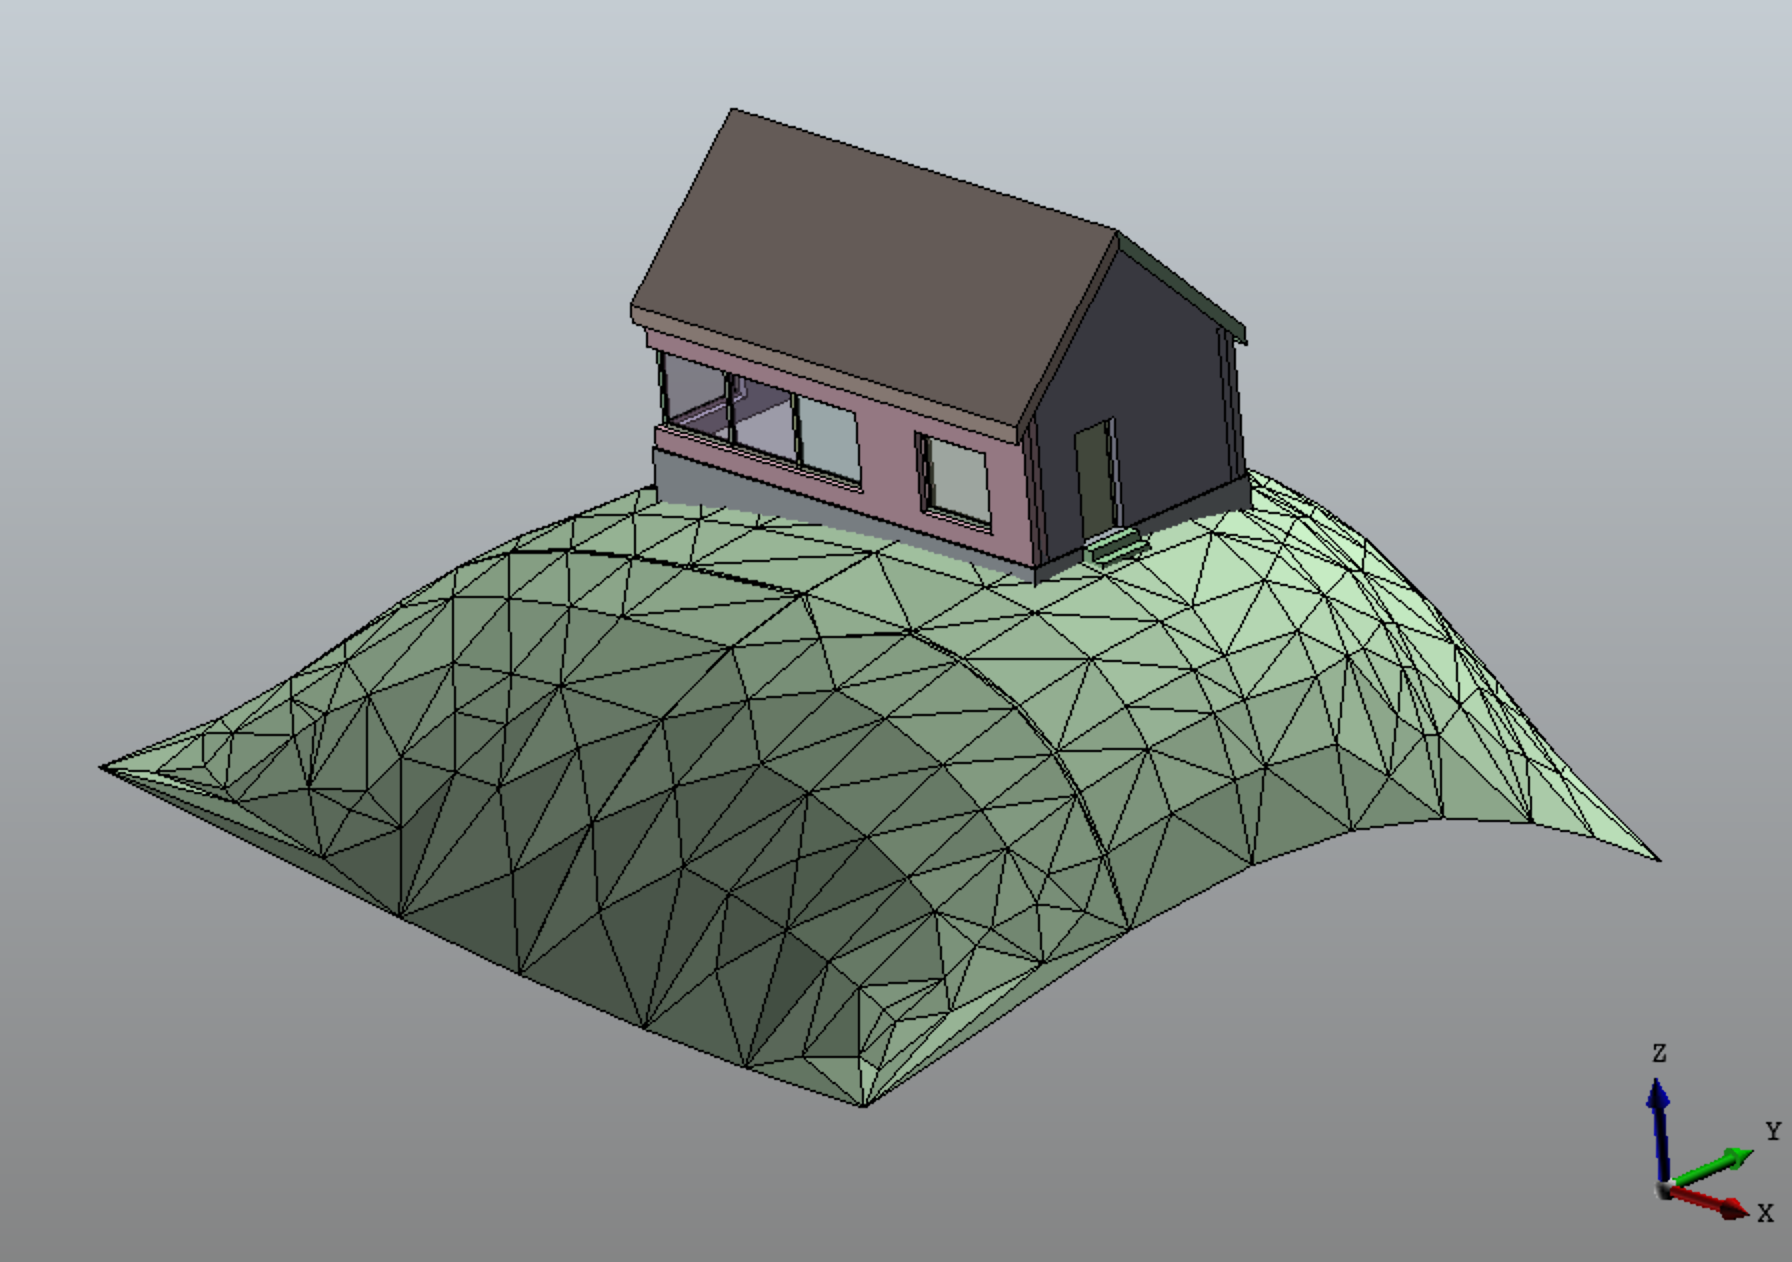

In [2]:
display(Image(filename='houseimage.png'))